In [1]:
import pickle
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline

In [3]:
        filename = '{}/results/{}/population_size_{}_update_days_{}_{}_static_sim_regrets_actions_l_indinew_coeff.pkl'.format('../../Downloads/pooling_results/batch/','case_one',32,1,'short')
        with open(filename,'rb') as f:
            dtable =pickle.load(f)

In [2]:
def get_to_plot_actions(actions):
    
    skeys = sorted(actions.keys())
    to_plot = []
    for k in skeys:
        to_plot.append(sum(actions[k])/len(actions[k]))
    return to_plot

In [3]:
def get_to_plot_regrets(actions):
    
    skeys = sorted(actions.keys())
    to_plot = []
    for k in skeys:
        to_plot.append(np.array(actions[k]).mean())
    return to_plot

In [4]:
def plot_and_save_dict_downsampled(d,title,save_title,save=False):
    x =get_to_plot_actions(d['actions'])
    x =[x[i+3] for i in range(0,len(x),5)]
    plt.figure(1) 
    plt.plot(x)
    plt.ylabel('Percent correct action ')
    plt.xlabel('Decision times')
    plt.title(title)
    plt.savefig('{}_{}_percent_correct_action_downsampled.png'.format(save_title,title))
    to_plotr =  get_to_plot_regrets(d['regrets'])
    to_plotr = [to_plotr[i+3] for i in range(0,len(to_plotr),5)]
    plt.figure(2) 
#to_plotr = [to_plotr[i] for i in range(0,len(to_plotr),5)]
    plt.plot(to_plotr)
    plt.ylabel('Regret')
    plt.xlabel('Decision times')
    plt.title(title)
    plt.savefig('{}_{}_regret_downsampled.png'.format(save_title,title))

In [6]:
def plot_and_save_dict(d,title,save_title,save=False):
    x =get_to_plot_actions(d['actions'])
    plt.figure(1) 
    plt.plot(x)
    plt.ylabel('Percent correct action ')
    plt.xlabel('Decision times')
    plt.title(title)
    if save:
        plt.savefig('{}_{}_percent_correct_action.png'.format(save_title,title))
    to_plotr =  get_to_plot_regrets(d['regrets'])
    plt.figure(2) 
#to_plotr = [to_plotr[i] for i in range(0,len(to_plotr),5)]
    plt.plot(to_plotr)
    plt.ylabel('Regret')
    plt.xlabel('Decision times')
    plt.title(title)
    if save:
        plt.savefig('{}_{}_regret.png'.format(save_title,title))

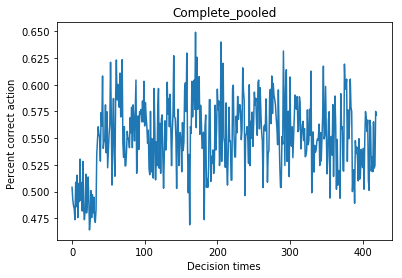

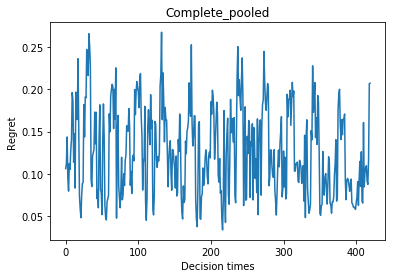

In [66]:
filename = '{}/{}/case_one_pooled_eb.pkl'.format('../../Downloads/pooling_results/EB','case_one',32,7,'short')
with open(filename,'rb') as f:
            dtable =pickle.load(f)
plot_and_save_dict(dtable,'Complete_pooled','weekly_updates_table',save=False)

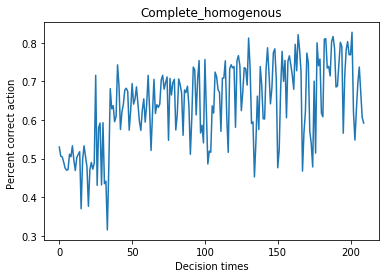

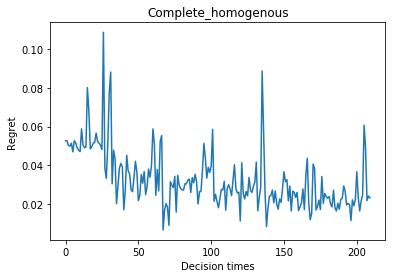

In [11]:
filename = '{}results/{}/population_size_{}_update_days_{}_{}_static_sim_regrets_actions_l_currentpriordifmu.pkl'.format('../../Downloads/pooling_results/batch/','case_one',32,7,'short')
with open(filename,'rb') as f:
            dtable =pickle.load(f)
plot_and_save_dict(dtable,'Complete_homogenous','daily_updates_table',save=False)

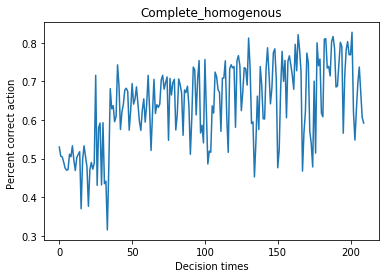

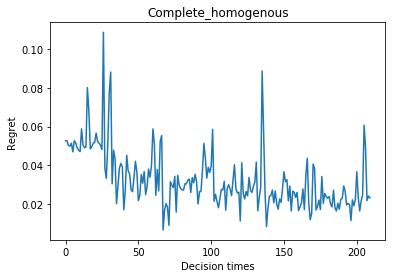

In [10]:
filename = '{}results/{}/population_size_{}_update_days_{}_{}_static_sim_regrets_actions_l_currentpriordifmu.pkl'.format('../../Downloads/pooling_results/batch/','case_one',32,7,'short')
with open(filename,'rb') as f:
            dtable =pickle.load(f)
plot_and_save_dict(dtable,'Complete_homogenous','daily_updates_table',save=False)

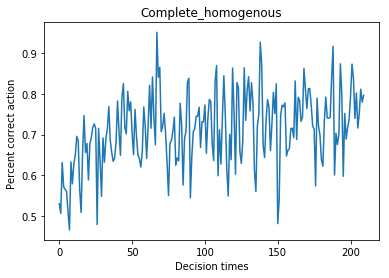

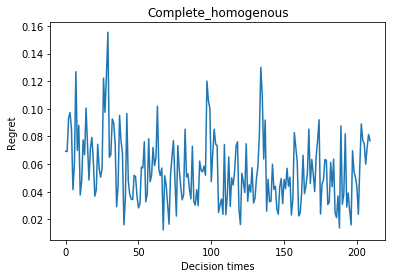

In [8]:
filename = '{}/results/{}/population_size_{}_update_days_{}_{}_static_sim_regrets_actions_l_current.pkl'.format('../../Downloads/pooling_results/batch/','case_one',32,1,'short')
with open(filename,'rb') as f:
            dtable =pickle.load(f)
plot_and_save_dict(dtable,'Complete_homogenous','daily_updates_table',save=False)


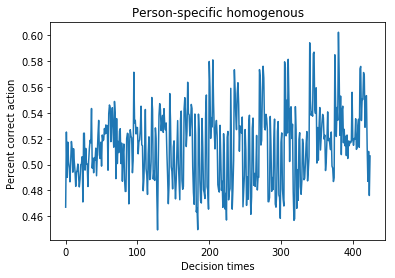

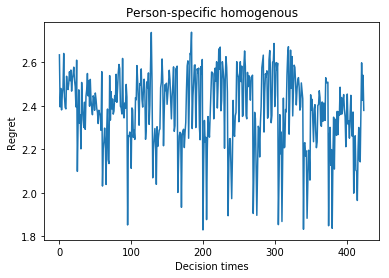

In [20]:
filename = '{}/results/{}/population_size_{}_update_days_{}_{}_static_sim_regrets_actions_l_table_coeff.pkl'.format('../../Downloads/pooling_results/personalized/','case_one',32,7,'short')
with open(filename,'rb') as f:
            dtable =pickle.load(f)
plot_and_save_dict(dtable,'Person-specific homogenous','daily_updates_table')

Text(0.5, 1.0, 'Person-specific')

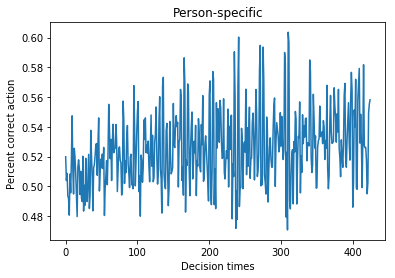

In [165]:

plt.plot(x)
plt.ylabel('Percent correct action ')
plt.xlabel('Decision times')
plt.title('Person-specific')
#plt.savefig('weekly_updates_percent_correct_action.png')

Text(0.5, 1.0, 'Person-specific')

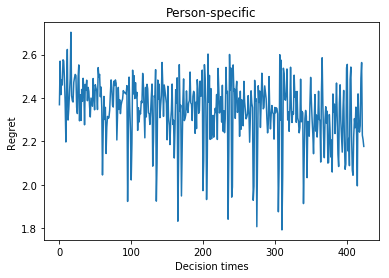

In [167]:
to_plotr =  get_to_plot_regrets(d['regrets'])
#to_plotr = [to_plotr[i] for i in range(0,len(to_plotr),5)]
plt.plot(to_plotr)
plt.ylabel('Regret')
plt.xlabel('Decision times')
plt.title('Person-specific')
#plt.savefig('weekly_updates_regret.png')
#plt.savefig('daily_updates_regret.png')

In [13]:
with open('{}merged_est.pkl'.format('../../Downloads/distributions/'),'rb') as f:
    merged  = pickle.load(f)

In [15]:
def adjust_to_thirty_minute(steps):
    return steps.fillna(0).tz_localize(None).resample('30T').sum().fillna(0)

In [22]:
all_steps = []
for k,v in merged.items():
    if k!=4:
        s = adjust_to_thirty_minute(v['steps'])
        all_steps.extend([math.log(i+.5) for i in s])

In [23]:
np.array(all_steps).std()

2.8443192693782087

In [24]:
6**.5

2.449489742783178

In [43]:
np.random.exponential(1)

0.5124009280078023